f(x) = -8x1 - 16x2 + x1^2 + 4x2^2
x1 + x2 <= 5
0 <= x1 <= 3
x2 >= 0


p = ((2, 0), (0, 8))  тк функция деленная на два
q = (-8, -16).T
g = ((1, 1), (-1, 0), (1, 0), (0, -1))
h = (5, 0, 3, 0).T

In [1]:
import numpy as np
from cvxopt import matrix, solvers

def svm_train(X, y, C):
    N, d = X.shape
    # Создаем матрицы для QP
    P = matrix(np.eye(d + 1))
    q = matrix(np.zeros(d + 1))
    
    # Объединяем X и y для условий
    A = matrix(np.hstack((y[:, None] * X, y)), (N, d + 1), 'd')
    b = matrix(np.ones(N))
    
    # Решаем QP
    sol = solvers.qp(P, q, A, b)
    
    # Получаем веса и смещение
    w = np.array(sol['x'][:-1]).flatten()
    b = sol['x'][-1]
    return w, b


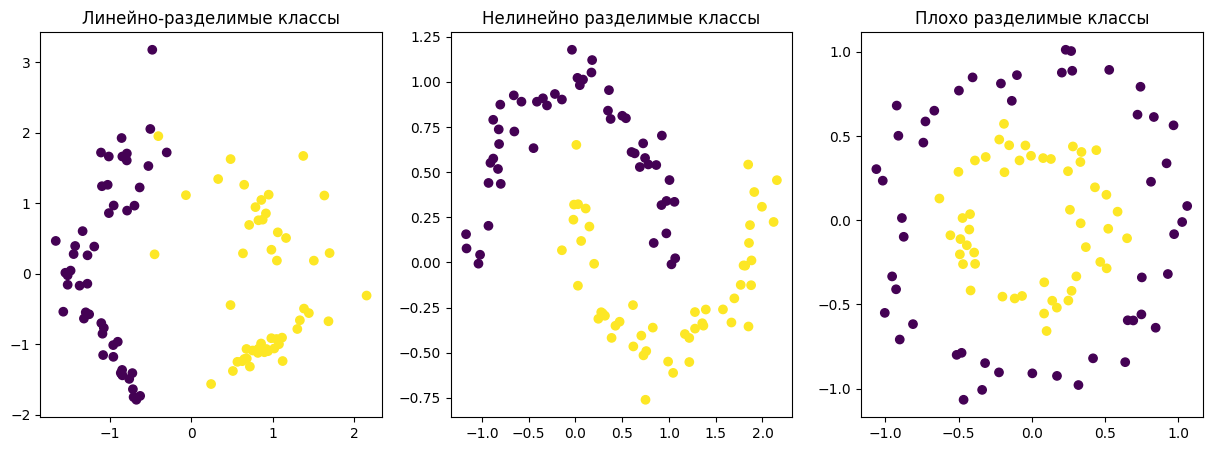

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles

# Генерация выборок
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)
X_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=1)
X_circles, y_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)

# Визуализация выборок
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear)
axs[0].set_title('Линейно-разделимые классы')
axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons)
axs[1].set_title('Нелинейно разделимые классы')
axs[2].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles)
axs[2].set_title('Плохо разделимые классы')
plt.show()


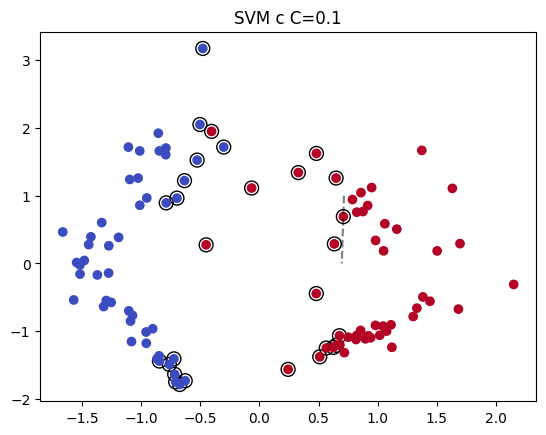

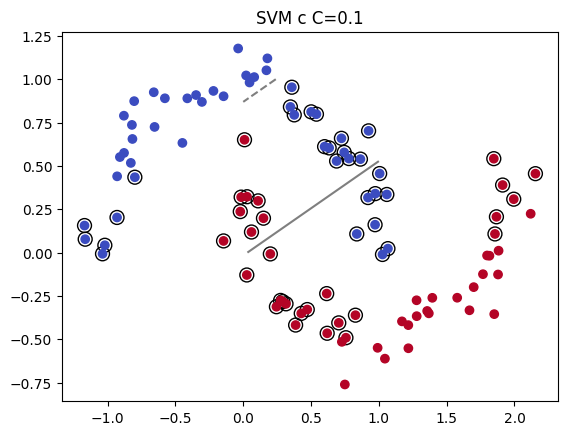

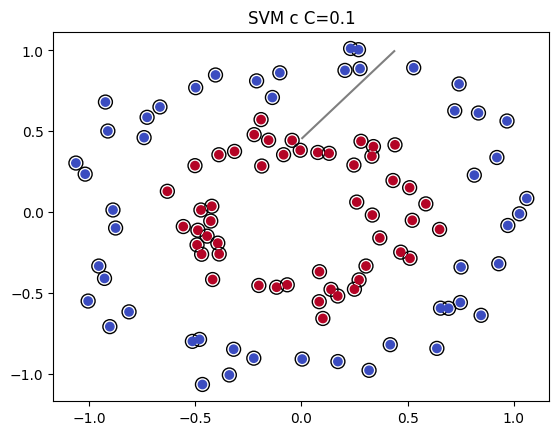

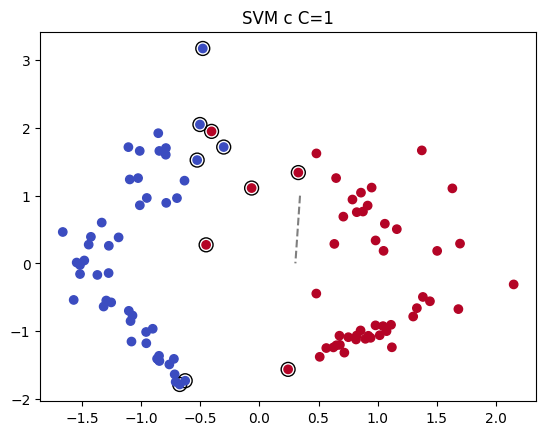

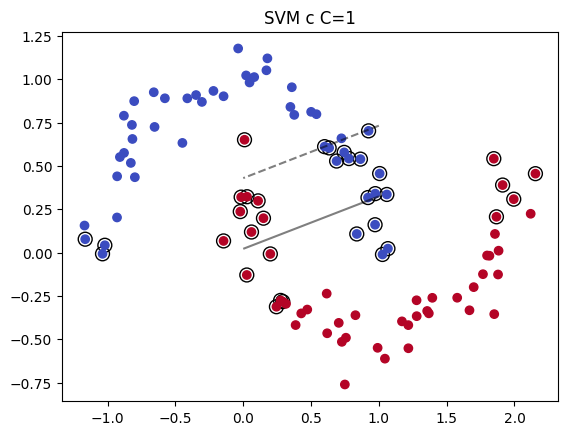

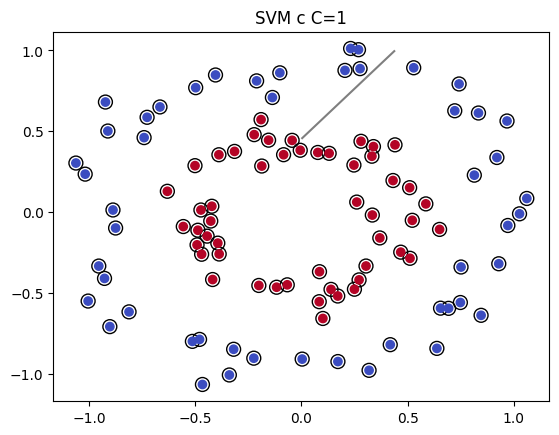

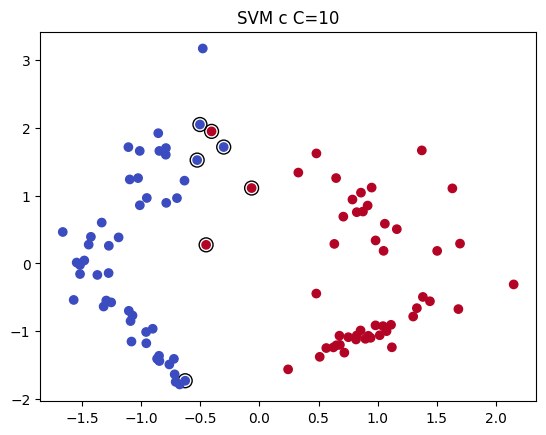

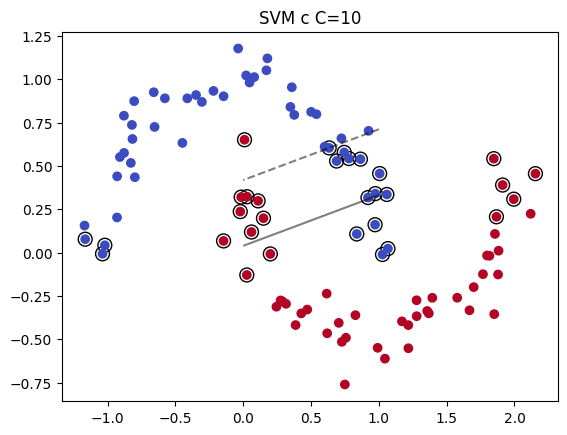

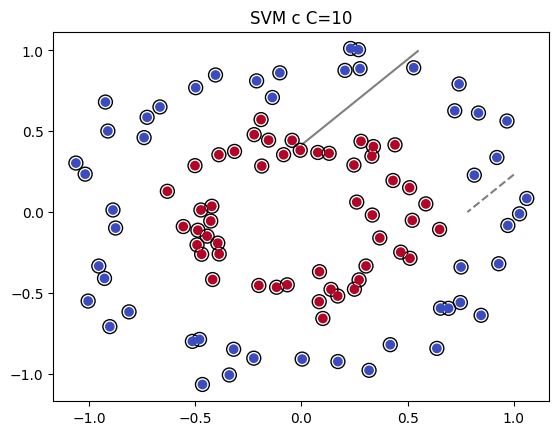

In [3]:
from sklearn.svm import SVC

def plot_svm(X, y, C):
    clf = SVC(C=C, kernel='linear')
    clf.fit(X, y)

    # Параметры графика
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Создание сетки для контуров
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение контуров
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Отображение опорных векторов
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k')

    # Отображение данных
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(f'SVM с C={C}')
    plt.show()

# Тестирование на каждой выборке с различными значениями C
for C in [0.1, 1, 10]:
    plot_svm(X_linear, y_linear, C)
    plot_svm(X_moons, y_moons, C)
    plot_svm(X_circles, y_circles, C)


Зависимость числа опорных векторов от параметра C
При увеличении C количество опорных векторов может увеличиваться для плохо разделимых классов, так как модель становится более чувствительной к ошибкам.
При малом значении C модель может игнорировать некоторые точки, что приводит к уменьшению числа опорных векторов.

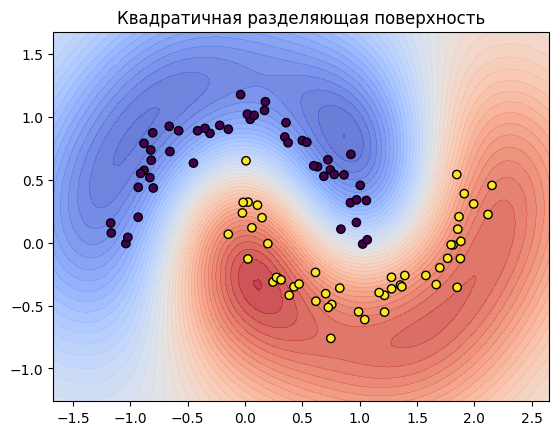

In [4]:
# Обучение SVM с RBF ядром для нелинейной границы
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X_moons, y_moons)

# Визуализация разделяющей поверхности
xx, yy = np.meshgrid(np.linspace(X_moons[:, 0].min()-0.5, X_moons[:, 0].max()+0.5, 100),
                     np.linspace(X_moons[:, 1].min()-0.5, X_moons[:, 1].max()+0.5, 100))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=50, cmap='coolwarm', alpha=0.8)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, edgecolors='k')
plt.title('Квадратичная разделяющая поверхность')
plt.show()


     pcost       dcost       gap    pres   dres
 0: -2.7500e+01 -1.7250e+01  4e+02  2e+01  3e-16
 1: -4.2503e+00 -1.5965e+01  2e+01  2e-01  4e-16
 2: -4.6087e+00 -5.4177e+00  9e-01  9e-03  4e-16
 3: -4.9961e+00 -5.0048e+00  1e-02  9e-05  3e-16
 4: -5.0000e+00 -5.0000e+00  1e-04  9e-07  3e-16
 5: -5.0000e+00 -5.0000e+00  1e-06  9e-09  2e-16
Optimal solution found.


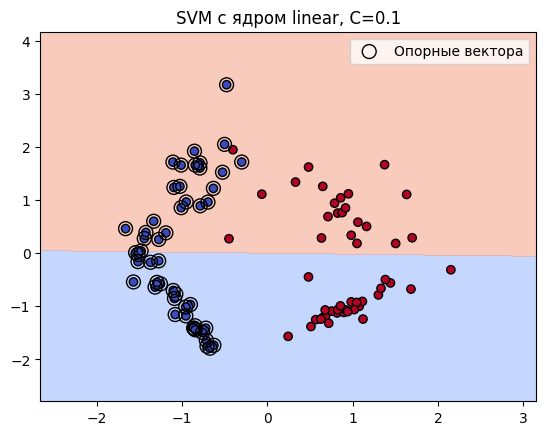

     pcost       dcost       gap    pres   dres
 0: -2.7500e+01 -1.7250e+01  4e+02  2e+01  2e-16
 1: -4.2503e+00 -1.5965e+01  2e+01  2e-01  2e-16
 2: -4.6087e+00 -5.4177e+00  9e-01  9e-03  3e-16
 3: -4.9961e+00 -5.0048e+00  1e-02  9e-05  2e-16
 4: -5.0000e+00 -5.0000e+00  1e-04  9e-07  3e-16
 5: -5.0000e+00 -5.0000e+00  1e-06  9e-09  3e-16
Optimal solution found.


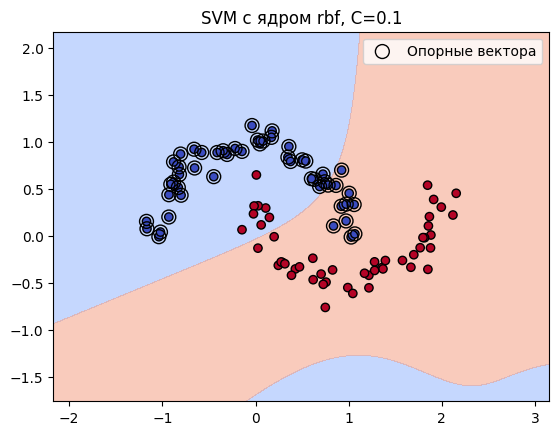

     pcost       dcost       gap    pres   dres
 0: -2.7500e+01 -1.7250e+01  4e+02  2e+01  2e-16
 1: -4.2503e+00 -1.5965e+01  2e+01  2e-01  3e-16
 2: -4.6087e+00 -5.4177e+00  9e-01  9e-03  4e-16
 3: -4.9961e+00 -5.0048e+00  1e-02  9e-05  4e-16
 4: -5.0000e+00 -5.0000e+00  1e-04  9e-07  2e-16
 5: -5.0000e+00 -5.0000e+00  1e-06  9e-09  2e-16
Optimal solution found.


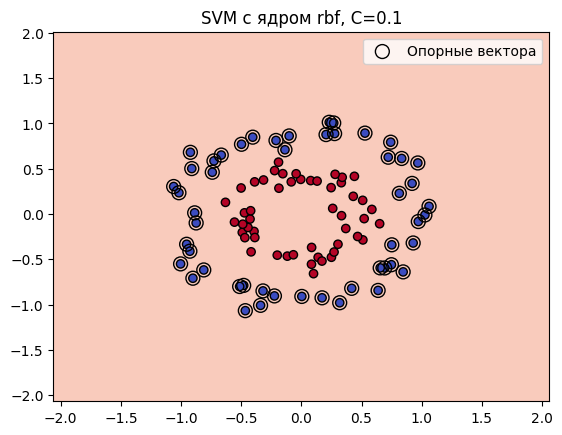

     pcost       dcost       gap    pres   dres
 0: -5.0000e+01 -1.5000e+02  4e+02  1e+00  2e-16
 1: -4.1599e+01 -8.0870e+01  4e+01  1e-02  3e-16
 2: -4.9111e+01 -5.0728e+01  2e+00  6e-04  4e-16
 3: -4.9991e+01 -5.0007e+01  2e-02  6e-06  3e-16
 4: -5.0000e+01 -5.0000e+01  2e-04  6e-08  3e-16
 5: -5.0000e+01 -5.0000e+01  2e-06  6e-10  5e-16
Optimal solution found.


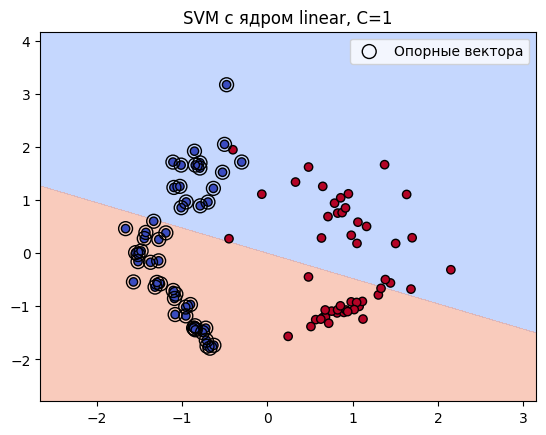

     pcost       dcost       gap    pres   dres
 0: -5.0000e+01 -1.5000e+02  4e+02  1e+00  1e-16
 1: -4.1599e+01 -8.0870e+01  4e+01  1e-02  5e-16
 2: -4.9111e+01 -5.0728e+01  2e+00  6e-04  5e-16
 3: -4.9991e+01 -5.0007e+01  2e-02  6e-06  4e-16
 4: -5.0000e+01 -5.0000e+01  2e-04  6e-08  3e-16
 5: -5.0000e+01 -5.0000e+01  2e-06  6e-10  5e-16
Optimal solution found.


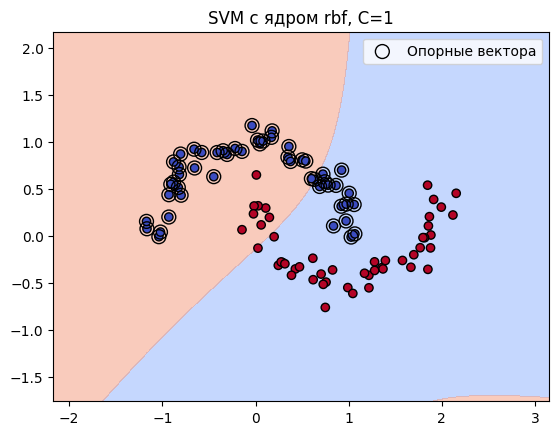

     pcost       dcost       gap    pres   dres
 0: -5.0000e+01 -1.5000e+02  4e+02  1e+00  2e-16
 1: -4.1599e+01 -8.0870e+01  4e+01  1e-02  4e-16
 2: -4.9111e+01 -5.0728e+01  2e+00  6e-04  4e-16
 3: -4.9991e+01 -5.0007e+01  2e-02  6e-06  3e-16
 4: -5.0000e+01 -5.0000e+01  2e-04  6e-08  3e-16
 5: -5.0000e+01 -5.0000e+01  2e-06  6e-10  5e-16
Optimal solution found.


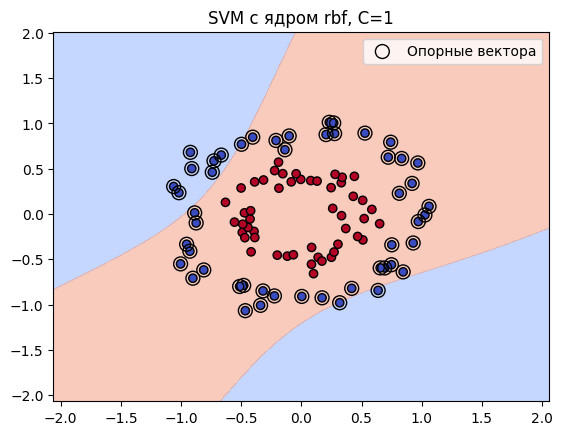

     pcost       dcost       gap    pres   dres
 0: -2.7500e+02 -3.7500e+03  5e+03  1e-01  2e-15
 1: -3.0654e+02 -5.5694e+02  3e+02  7e-03  2e-15
 2: -4.9813e+02 -5.1720e+02  2e+01  3e-04  2e-15
 3: -4.9998e+02 -5.0017e+02  2e-01  3e-06  2e-15
 4: -5.0000e+02 -5.0000e+02  2e-03  3e-08  1e-15
 5: -5.0000e+02 -5.0000e+02  2e-05  3e-10  1e-15
Optimal solution found.


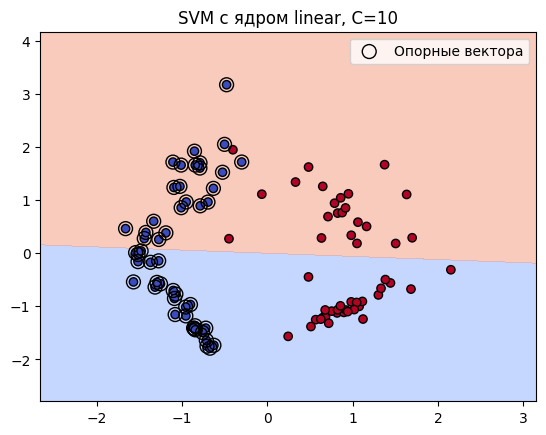

     pcost       dcost       gap    pres   dres
 0: -2.7500e+02 -3.7500e+03  5e+03  1e-01  2e-15
 1: -3.0654e+02 -5.5694e+02  3e+02  7e-03  2e-15
 2: -4.9813e+02 -5.1720e+02  2e+01  3e-04  1e-15
 3: -4.9998e+02 -5.0017e+02  2e-01  3e-06  2e-15
 4: -5.0000e+02 -5.0000e+02  2e-03  3e-08  1e-15
 5: -5.0000e+02 -5.0000e+02  2e-05  3e-10  1e-15
Optimal solution found.


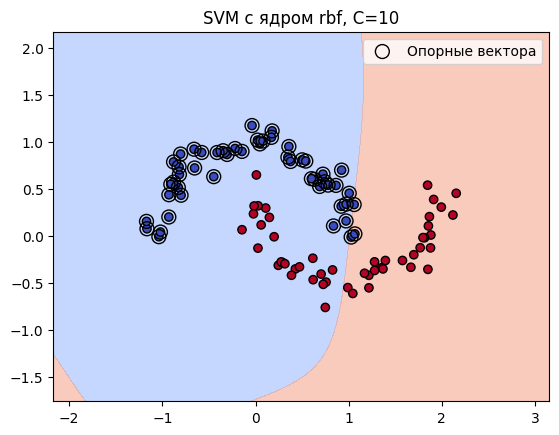

     pcost       dcost       gap    pres   dres
 0: -2.7500e+02 -3.7500e+03  5e+03  1e-01  2e-15
 1: -3.0654e+02 -5.5694e+02  3e+02  7e-03  1e-15
 2: -4.9813e+02 -5.1720e+02  2e+01  3e-04  2e-15
 3: -4.9998e+02 -5.0017e+02  2e-01  3e-06  1e-15
 4: -5.0000e+02 -5.0000e+02  2e-03  3e-08  2e-15
 5: -5.0000e+02 -5.0000e+02  2e-05  3e-10  2e-15
Optimal solution found.


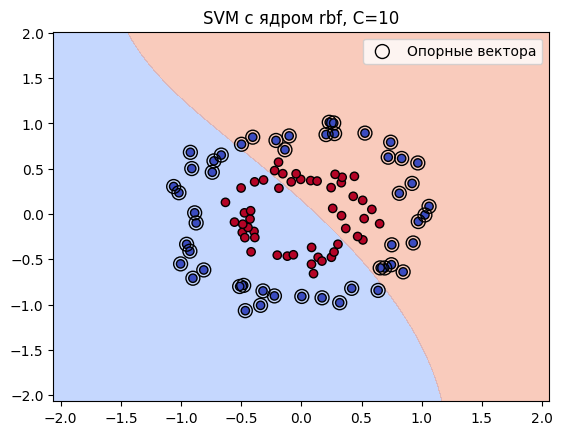

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from cvxopt import matrix, solvers

# Определение ядра
def kernel(X, Y, kernel_type='linear', p=2, gamma=1.0):
    if kernel_type == 'linear':
        return np.dot(X, Y.T)
    elif kernel_type == 'polynomial':
        return (np.dot(X, Y.T) + 1) ** p
    elif kernel_type == 'rbf':
        sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(Y**2, axis=1) - 2 * np.dot(X, Y.T)
        return np.exp(-gamma * sq_dists)

# Обучение SVM
def svm_train(X, y, C, kernel_type='linear', p=2, gamma=1.0):
    N = X.shape[0]
    K = kernel(X, X, kernel_type, p, gamma)
    
    # Создаем матрицы для QP
    P = matrix(np.outer(y, y) * K)
    q = matrix(-np.ones(N))
    G = matrix(np.vstack((-np.eye(N), np.eye(N))))
    h = matrix(np.hstack((np.zeros(N), C * np.ones(N))))
    A = matrix(y, (1, N), 'd')
    b = matrix(0.0)
    
    # Решаем QP
    sol = solvers.qp(P, q, G, h, A, b)
    
    # Получаем альфа-коэффициенты
    alpha = np.array(sol['x']).flatten()
    return alpha, K

# Визуализация SVM
def plot_svm(X, y, C, kernel_type='linear', p=2, gamma=1.0):
    alpha, K = svm_train(X, y, C, kernel_type, p, gamma)
    support_vectors = np.where(alpha > 1e-5)[0]

    # Определяем разделяющую поверхность
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

    # Векторизуем сетку
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    K_grid = kernel(grid_points, X, kernel_type, p, gamma)

    # Оценка на сетке
    Z = np.dot((alpha * y).T, K_grid.T)  # Исправление: используем K_grid.T
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.scatter(X[support_vectors][:, 0], X[support_vectors][:, 1], 
                s=100, facecolors='none', edgecolors='k', label='Опорные вектора')
    plt.title(f'SVM с ядром {kernel_type}, C={C}')
    plt.legend()
    plt.show()

# Генерация выборок
X_linear, y_linear = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)
X_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=1)
X_circles, y_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)

# Тестируем на разных выборках
for C in [0.1, 1, 10]:
    plot_svm(X_linear, y_linear, C, kernel_type='linear')
    plot_svm(X_moons, y_moons, C, kernel_type='rbf', gamma=1.0)
    plot_svm(X_circles, y_circles, C, kernel_type='rbf', gamma=1.0)


### 3. Поведение SVM с полиномиальным ядром

СVM с полиномиальным ядром проявляет различные характеристики в зависимости от параметров \( C \) и степени ядра \( p \):

- **Параметр \( C \)**: 
  - **Низкие значения** \( C \) (например, 0.1) приводят к более гладким границам принятия решения, позволяя некоторым ошибкам. Это может помочь избежать переобучения, но иногда ведет к недостаточной точности на сложных данных.
  - **Высокие значения** \( C \) (например, 10) заставляют модель более жестко подходить к данным, уменьшая количество ошибок, но это может привести к переобучению, особенно на данных с шумом.

- **Степень \( p \)**:
  - Более высокие степени \( p \) позволяют модели захватывать более сложные зависимости в данных, но это также может привести к переобучению. Например, с \( p = 3 \) граница может стать очень сложной, если данные имеют шум.
  - Низкие степени, такие как \( p = 2 \), обычно приводят к более простым границам.

### 4. Поведение SVM с RBF-ядром

Для SVM с RBF-ядром:

- **Параметр \( C \)**:
  - С низким \( C \) граница решения будет более гладкой, что может быть полезно для предотвращения переобучения.
  - С высоким \( C \) модель будет более чувствительной к данным и может начать переобучаться, особенно если данные содержат шум.

- **Параметр \( \gamma \)**:
  - Низкие значения \( \gamma \) делают функцию ядра более гладкой, что может привести к недообучению, так как модель не сможет адекватно захватить сложные структуры данных.
  - Высокие значения \( \gamma \) делают функцию ядра более чувствительной к изменениям в данных, что может вызвать переобучение, так как модель может слишком точно подстраиваться под тренировочные данные.


- Для **логарифмической сетки** параметров \( C \) и \( \gamma \) можно использовать, например, значения:
  - \( C = [0.01, 0.1, 1, 10, 100] \)
  - \( \gamma = [0.01, 0.1, 1, 10, 100] \)

- **Переобучение** наблюдается при высоких значениях \( C \) и \( \gamma \), когда модель слишком точно подстраивается под данные.
- **Недообучение** происходит при низких значениях \( C \) и \( \gamma \), когда модель не может захватить нужную сложность данных.

